# Decision Trees

Decision trees are very versatile ML algorithms that can be used for regression and classification problems. Their advantages are that they don't require much data pre-processing (i.e., **no scaling or centering needed**) and that they are **explainable to stakeholders** using a printed decision tree. 

Furthermore, decision trees are the building blocks of one of the most powerful ML algorithm family: Random Forest.

In [37]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2)

In [31]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [21]:
# Export plot as dot file and render

import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_clf,out_file=None,feature_names=iris.feature_names[2:],class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open("classifiers/classifier.txt","w+")
f.write(dot_data)
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'classifiers/classifier.txt'

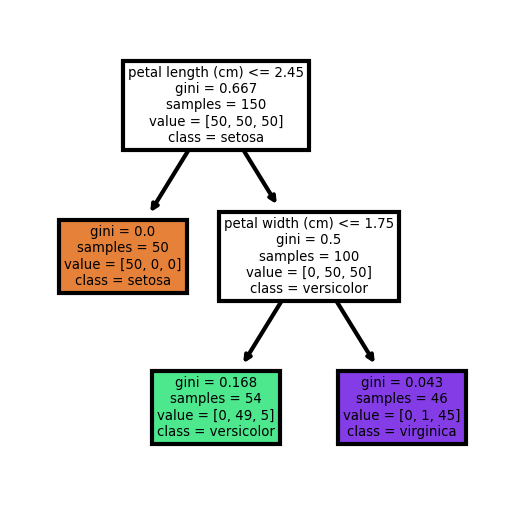

In [39]:
# Plot using matplotlib in notebook directly 

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)

plot_tree(tree_clf,
           feature_names = iris.feature_names[2:], 
           class_names=iris.target_names,
           filled = True);

# You can save your plot if you want
#fig.savefig('imagename.png')

### Interpretation:
The tree starts at the top and each instance moves through the branches until they reach a terminal node (leaf) which corresponds to their predicted class. In the first node we would ask "has this instance a petal length (pl) of smaller or equal to 2.45?". If that is the case, we would move along the left side, and if not then on the right side. Let's say we have an instance with pl <= 2.45, then we would reach the orange terminal node and would predict the class to be setosa. 

Let's say we have an instance with a pl = 3.2 and pw = 2.5, then we would move along the right path to the second node. Since our pw is not smaller or equal to 1.75, we would continue on the right path and reach the purple leaf corresponding to the class virginica.

- **gini** is a measure for impurity; the closer it is to 0, the more training instances actually belong to the same class at each node. Thus, we want to have leafs with the smallest gini values as possible.
- **samples** stands for how many training instances this applies to
- **value** shows the number of training instances per class that this node applies to. It is the numeric values on which the gini score is calculated.
- **class** is the predicted class for the respective leaf.

**Entropy** can be used as an alternative impurity measure to **gini**. Both usually arrive at a very similar result. Since gini is faster, it's a good default. However, when gini and entropy differ, it is usually that gini isolates the most frequent class while entropy leads to more balanced trees.

**Class probability** is calculated at the leafs by dividing the number of training instances per class by the total number of training instances at the leaf. For example the green leaf: Probability of class Versicolor is 49/54=90.7%.

### CART Training algorithm
Scikit-Learn uses the Classification and Regression Tree (CART) algorithm by default to train Decision Trees. Trees are split binary using a single feature. This process is then repeated until max_depth is reached or the leafs purity cannot be improved. 

This makes CART a **greedy algorithm** as it is looking for the optimal split at each level separately without checking whether the split will lead to the lowest possible impurity several levels down or at the leafs.

Addional hyperparameters control the stopping conditions as well by regularization.

### Regularizating Hyperparameters

Decision trees make very few assumptions (unlike other models like linear models) and if they are left unconstrained, they tend to overfit the training data. A decision tree model without pre-defined hyperparameters is called a *non-parametric model*.

Like many models, Decision Trees need to be regularized while training to not overfit, for example max_depth, min_sample_leaf, min_sample_split, ... As a rule of thumb, increasing min_hyperparameters and decreasing max_hyperparameters will reduce the model's complexity.

# Exercise 1: Make Moons Data

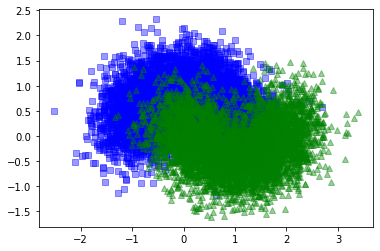

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=4)

plt.plot(X[y==0, 0], X[y==0,1], "bs", alpha=0.4)
plt.plot(X[y==1, 0], X[y==1,1], "g^", alpha=0.4)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf_tree_unconstrained = DecisionTreeClassifier() # non-parametric model
clf_tree_unconstrained.fit(X_train, y_train)

print("Validation training data: " + str(clf_tree_unconstrained.score(X_train, y_train)))
print("Validation test data: " + str(clf_tree_unconstrained.score(X_test, y_test)))

Validation training data: 1.0
Validation test data: 0.797


In [25]:
import pandas as pd

scores_df = pd.DataFrame()

max_leaf_nodes = [1000,500,200,100,75,50,40,30,20,10,8,5,2]

for nb_max_leaf_nodes in max_leaf_nodes:
    print("max_leaf_nodes = " + str(nb_max_leaf_nodes))
    clf_tree_constrained = DecisionTreeClassifier(max_leaf_nodes=nb_max_leaf_nodes) # parametric model
    clf_tree_constrained.fit(X_train, y_train)

    print("Validation training data: " + str(clf_tree_constrained.score(X_train, y_train)))
    print("Validation test data: " + str(clf_tree_constrained.score(X_test, y_test)))
    
    scores_df.at[nb_max_leaf_nodes, "Training Score"] = clf_tree_constrained.score(X_train, y_train)
    scores_df.at[nb_max_leaf_nodes, "Test Score"] = clf_tree_constrained.score(X_test, y_test)


max_leaf_nodes = 1000
Validation training data: 0.983375
Validation test data: 0.8045
max_leaf_nodes = 500
Validation training data: 0.942375
Validation test data: 0.8255
max_leaf_nodes = 200
Validation training data: 0.907625
Validation test data: 0.834
max_leaf_nodes = 100
Validation training data: 0.88975
Validation test data: 0.843
max_leaf_nodes = 75
Validation training data: 0.8855
Validation test data: 0.842
max_leaf_nodes = 50
Validation training data: 0.879375
Validation test data: 0.8465
max_leaf_nodes = 40
Validation training data: 0.876125
Validation test data: 0.8445
max_leaf_nodes = 30
Validation training data: 0.874
Validation test data: 0.8395
max_leaf_nodes = 20
Validation training data: 0.871
Validation test data: 0.8425
max_leaf_nodes = 10
Validation training data: 0.86425
Validation test data: 0.844
max_leaf_nodes = 8
Validation training data: 0.8605
Validation test data: 0.8425
max_leaf_nodes = 5
Validation training data: 0.8605
Validation test data: 0.8425
max_lea

In [26]:
scores_df

,Training Score,Test Score
1000,0.983375,0.8045
500,0.942375,0.8255
200,0.907625,0.8340
100,0.889750,0.8430
75,0.885500,0.8420
50,0.879375,0.8465
40,0.876125,0.8445
30,0.874000,0.8395
20,0.871000,0.8425
10,0.864250,0.8440


Text(0.5, 0, 'Number of max_leaf_nodes')

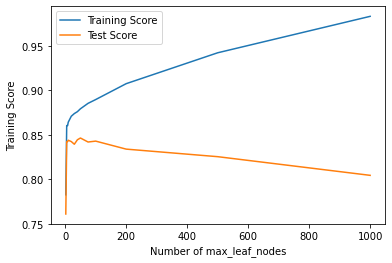

In [28]:
import seaborn as sns
sns.lineplot(x=scores_df.index, y=scores_df['Training Score'], label="Training Score")
sns.lineplot(x=scores_df.index, y=scores_df['Test Score'], label="Test Score")
plt.xlabel("Number of max_leaf_nodes")

#### Interpretation:
We can see that the Training score increases with the number of max_leaf_nodes. The less constrained the model, the better the performance on the training data. However using the test data we can see the score to decrease. This is the Bias-Variance-Tradeoff in action.

We should use a hyperparameter setting that balances the performance on training and test data. In this case, I would use max_leaf_nodes around 50 or test values between 200 and 40.

The graph below shows 42 to 46 seem to be the best option on test data with 46 being the best of these three on training data as well.

In [32]:
import pandas as pd
import numpy as np

scores_df = pd.DataFrame()

max_leaf_nodes = np.arange(40,200,2)

for nb_max_leaf_nodes in max_leaf_nodes:
    # print("max_leaf_nodes = " + str(nb_max_leaf_nodes))
    clf_tree_constrained = DecisionTreeClassifier(max_leaf_nodes=nb_max_leaf_nodes) # parametric model
    clf_tree_constrained.fit(X_train, y_train)

    #print("Validation training data: " + str(clf_tree_constrained.score(X_train, y_train)))
    #print("Validation test data: " + str(clf_tree_constrained.score(X_test, y_test)))
    
    scores_df.at[nb_max_leaf_nodes, "Training Score"] = clf_tree_constrained.score(X_train, y_train)
    scores_df.at[nb_max_leaf_nodes, "Test Score"] = clf_tree_constrained.score(X_test, y_test)

scores_df

,Training Score,Test Score
40,0.876125,0.8445
42,0.877125,0.8470
44,0.877625,0.8470
46,0.878375,0.8470
48,0.879000,0.8460
...,...,...
190,0.906000,0.8355
192,0.906375,0.8345
194,0.906500,0.8360
196,0.906875,0.8350


Text(0.5, 0, 'Number of max_leaf_nodes')

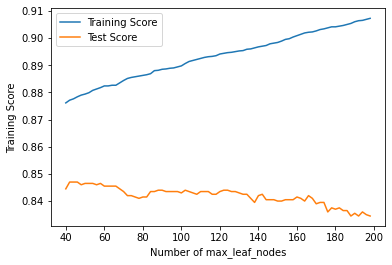

In [33]:
import seaborn as sns
sns.lineplot(x=scores_df.index, y=scores_df['Training Score'], label="Training Score")
sns.lineplot(x=scores_df.index, y=scores_df['Test Score'], label="Test Score")
plt.xlabel("Number of max_leaf_nodes")

We will use max_leaf_nodes = 46 now on the whole data set to see how well our model separates the two classes. We arrive at a classification accuracy of 87% which is in range of what Géron expects for the solution.

In [34]:
from sklearn.tree import DecisionTreeClassifier

clf_tree_final = DecisionTreeClassifier(max_leaf_nodes=46) # final model 
clf_tree_final.fit(X, y)

print("Validation score: " + str(clf_tree_final.score(X, y)))

Validation score: 0.8742
